## Curves, Surfaces, and their Curvatures

There is a natural linear transformation on the tangent plane of a surface whose eigenvalues yield the curvatures at the point.

### Space Curves

A space curve is a smooth mapping of a real interval $[a,b]$ into $\maR^3$. For example, 

\begin{equation}\label{eq:g}
  \gamma(t)\equiv (r\cos(t/c), r\sin(t/c), ht/c) 
\end{equation}

describes a helix as $t$ moves through $\maR$. Its **tangent vector**

\begin{equation}\label{eq:gp}
  \gamma'(t)=(-r\sin(t/c), r\cos(t/c), h)/c
\end{equation}

has length 
$\|\gamma'(t)\|=\sqrt{r^2+h^2}/c$ and so with $c=\sqrt{r^2+h^2}$ we say $\gamma$ has unit speed. In this case we define the **curvature vector**

\begin{equation}\label{eq:gpp}
  \gamma''(t) = (-r\cos(t/c), -r\sin(t/c), 0)/c^2
\end{equation}

and the **curvature** to be its magnitude

\begin{equation}\label{eq:kappa}
  \kappa \equiv \|\gamma''(t)\| = \frac{r}{r^2+h^2}
\end{equation}

It is customary to label the tangent and normalized curvature vectors by

\begin{equation}\label{eq:TN}
   \cT(t) \equiv \gamma'(t) \and \N(t) \equiv \gamma''(t)/\kappa(t) = \cT'(t)/\kappa
\end{equation}

and to call $\N(t)$ the **principal normal vector** and then to 
complete the frame with **binormal vector**

\begin{equation}\label{eq:bin}
    \cB(t)\equiv \cT(t)\times \N(t) = (h\sin(t/c), -h\cos(t/c), r)/c
\end{equation}

and note that its derivative

\begin{equation}\label{eq:binp}
    \cB'(t) = (h\cos(t/c), h\sin(t/c), 0)/c^2
\end{equation}

is proportional to $\N(t)$. In particular $\cB'(t)=-\tau\N(t)$ where

\begin{equation}\label{eq:torsion}
    \tau = \frac{h}{r^2+h^2}
\end{equation}

is the **torsion** of $\gamma$. Please use the widget in Figure \ref{fig:helix} and observe the orientation of $(\cT(0),\N(0),\cB(0))$ as the helical parameters $r$ and $h$ are varied.

\begin{exercise}\label{ex:binx} We have confirmed in (\ref{eq:binp}) that $\cB'(t)$ is proportional to $\N$ for the helix. To see that this is always the case

(i) Differentiate $\N(t)^T\N(t)=1$ and conclude that $\N'(t)^T\N(t)=0$.

(ii) Differentiate $\cT(t)\times\N(t)$ and show $\cB'(t)=\cT(t)\times \N'(t)$ and deduce from (i) that $\cB'(t)\propto \N(t)$.

\end{exercise}


In [56]:
# helix widget, draw frame at t=0 from base point (r,0,0)

%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import *

plt.ioff()
t = np.linspace(-30,30,1001)
fig = plt.figure(' ')
ax = plt.axes(projection="3d")    # set up for 3D work

r = 2
h = 1
c = np.sqrt(r*r+h*h)
helix, = ax.plot3D(r*np.cos(t/c), r*np.sin(t/c), h*t/c, 'b') 
T, = ax.plot3D([r, r], [0, r/c], [0, h/c], 'r')
Ttext = ax.text(r, r/c, h/c,'$\cal T$')
N, = ax.plot3D([r, r-1], [0, 0], [0, 0], 'g')
Ntext = ax.text(r-1, 0, 0,'$\cal N$')
B, = ax.plot3D([r, r], [0, -h/c], [0, r/c], 'm')
Btext = ax.text(r, -h/c, r/c,'$\cal B$')

ax.set_xlim([-4,4])
ax.set_ylim([-4,4])
ax.set_zlim([-4,4])

rS = widgets.FloatSlider(min=0, max=10, step=0.1, value=2, description='radius: $r$')
hS = widgets.FloatSlider(min=-5, max=5, step=0.1, value=1, description='height: $h$') 

def update( r=rS, h=hS ):
    c = np.sqrt(r*r+h*h)
    helix.set_data_3d(r*np.cos(t/c), r*np.sin(t/c), h*t/c)
    T.set_data_3d([r, r], [0, r/c], [0, h/c])
    N.set_data_3d([r, r-1], [0, 0], [0, 0])
    B.set_data_3d([r, r], [0, -h/c], [0, r/c])
    Ttext.set_position((r, r/c))
    Ttext.set_3d_properties(h/c)
    Ntext.set_position((r-1, 0))
    Ntext.set_3d_properties(0)
    Btext.set_position((r, -h/c))
    Btext.set_3d_properties(r/c)
    fig.canvas.draw_idle()

widgets.interactive(update)
layoutS = widgets.Layout(display='flex', flex_flow='column', justify_content='center')
controls = widgets.VBox([rS, hS], layout = layoutS)
widgets.HBox([fig.canvas, controls])

\begin{myfig}\label{fig:helix} A helix with its red tangent, $\cT$, green principal normal, $\N$, and magenta binormal, $\cB$, vectors at $t=0$. \end{myfig}

## Surfaces

A surface, $\cM$, is the image of a smooth, one-to-one, regular mapping of a real rectangle $\{(s,t): a\le s\le b,\,c\le t\le d\}$ into $\maR^3$. A mapping $(s,t)\mapsto\gamma(s,t)$ is regular when the coordinate derivatives $\p_s\gamma(s,t)$ and
$\p_s\gamma(s,t)$ are linearly independent for each $(s,t)$. For example, 

\begin{equation}\label{eq:g2}
  \gamma(s,t)\equiv (s\cos(t), s\sin(t), ht) 
\end{equation}

for fixed $h$ describes a helicoid. Its coordinate derivatives are tangent vectors,

\begin{equation*}
  \p_s\gamma(s,t) = (\cos(t), \sin(t), 0) \and \p_t\gamma(s,t) = (-s\sin(t), s\cos(t), h)
\end{equation*}

and its unit normal is

\begin{equation*}
  n(\gamma(s,t)) = \frac{\p_s\gamma(s,t) \times \p_t\gamma(s,t)}{\|\p_s\gamma(s,t) \times \p_t\gamma(s,t)\|}
    = \frac{(h\sin(t), -h\cos(t), s)}{\sqrt{s^2+h^2}} 
\end{equation*}

We note that $\p_s\gamma$ and $\p_t\gamma$ are perpendicular to one another and so generate the tangent space to $\cM$ at $\gamma(s,t)$,

\begin{equation}\label{eq:Mtan}
  T_{\gamma(s,t)} (\cM) = \{a\p_s\gamma(s,t)+b\p_t\gamma(s,t):(a,b)\in\maR^2\}
\end{equation}

We have illustrated each of these objects in Figure \ref{fig:helicoid} below.

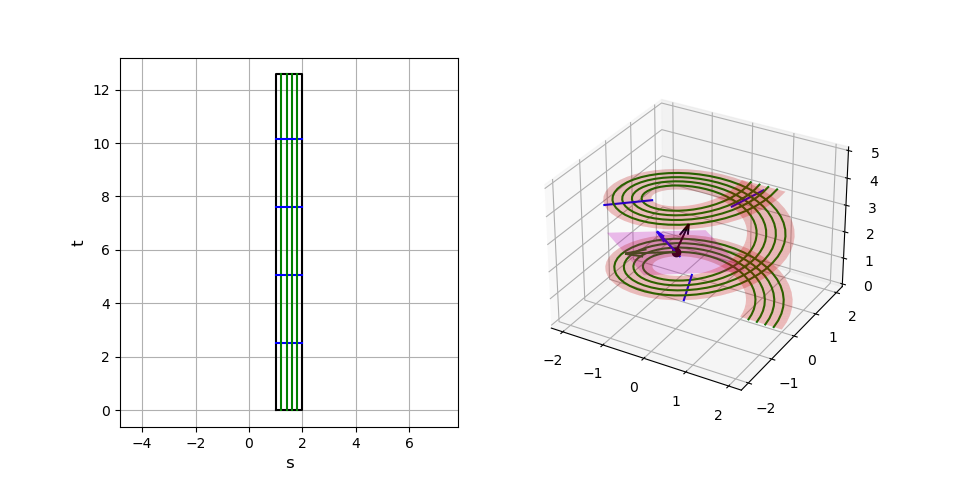

In [77]:
# helicoid graph

%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from ipywidgets import *

fig = plt.figure(' ', figsize=plt.figaspect(0.5))

ax1 = fig.add_subplot(1, 2, 1) 

# plot the grid
r = np.linspace(1,2,100)
t = np.linspace(0,4*np.pi,100)
R, T = np.meshgrid(r, t)  

ax1.plot([1,2,2,1,1],[0,0,4*np.pi,4*np.pi,0],'k')  # the rectangle

for n in range(1,5):
    ax1.plot(R[n*20,:],T[n*20,:],'b')
    ax1.plot(R[:,n*20],T[:,n*20],'g')
    
ax1.axis('equal')
ax1.grid('on')
ax1.set_xlabel('s', fontsize=12)
ax1.set_ylabel('t', fontsize=12)

ax2 = fig.add_subplot(1, 2, 2, projection='3d')
# plot the surface
h = 0.4 
Zc = h*T
Xc = R*np.cos(T)
Yc = R*np.sin(T)
ax2.plot_surface(Xc, Yc, Zc, alpha = 0.25, color='r')

# plot the the transformed grid
for n in range(1,5):
    ax2.plot3D(Xc[n*20,:],Yc[n*20,:],Zc[n*20,:],'b')
    ax2.plot3D(Xc[:,n*20],Yc[:,n*20],Zc[:,n*20],'g')
    
# plot tangents and normal
x = Xc[20,20]
y = Yc[20,20]
z = Zc[20,20]
ax2.plot3D(x, y, z,'ko')

t = T[20,20]
r = R[20,20]
fx = np.array([np.cos(t), np.sin(t), 0])
fy = np.array([-r*np.sin(t), r*np.cos(t), h])
fz = np.array([h*np.sin(t), -h*np.cos(t), r])/np.sqrt(h**2+r**2)

ax2.quiver([x,x,x], [y,y,y], [z,z,z],
           [fx[0],fy[0],fz[0]], [fx[1],fy[1],fz[1]], [fx[2],fy[2],fz[2]], colors=['b','g','k','b','b','g','g','k','k'], 
          arrow_length_ratio=.4)

# draw the tangent plane
Tx = [x+fx[0]+fy[0], x+fx[0]-fy[0], x-fx[0]-fy[0], x-fx[0]+fy[0]]
Ty = [y+fx[1]+fy[1], y+fx[1]-fy[1], y-fx[1]-fy[1], y-fx[1]+fy[1]]
Tz = [z+fx[2]+fy[2], z+fx[2]-fy[2], z-fx[2]-fy[2], z-fx[2]+fy[2]]
verts = [list(zip(Tx, Ty, Tz))]
ax2.add_collection3d(Poly3DCollection(verts, facecolors = 'm', alpha = 0.25))

plt.show()

\begin{myfig}\label{fig:helicoid} The mapping $\gamma(s,t)\equiv (s\cos(t), s\sin(t), 2t/5)$ from the rectangle $\{(s,t);1\le s\le 2,\, 0\le t\le 4\pi\}$ (at left) to the pink helicoid at right. We have also plotted the four blue lines, $s\mapsto(s,4n\pi/5)$ and their images under $\gamma$, and 4 green lines,
$t\mapsto(1+n/5,t)$, and their images, where $n=1,2,3,4$. We have placed a black dot at their intersection on the helicoid when $n=1$ and
plotted there its blue tangent vector, $\p_s\gamma(6/5,4\pi/5)$, its
green tangent vector, $\p_t\gamma(6/5,4\pi/5)$, its black normal vector $n(\gamma(6/5,4\pi/5))$, and a piece of its magenta tangent plane, $T_{\gamma(6/5,4\pi/5)}\cM$.
\end{myfig}

We note that both $\p_s\gamma(s,t)$ and $\p_t\gamma(s,t)$ are tangent to $\cM$ at $\gamma(s,t)$. Hence each are perpendicular to the normal vector $n(\gamma(s,t))$. That is


\begin{equation}\label{eq:pgn}
  \p_s\gamma(s,t)^Tn(\gamma(s,t)) = 0 \and \p_t\gamma(s,t)^Tn(\gamma(s,t)) = 0
\end{equation}

As these hold for all $(s,t)$ we may differentiate, say the first in (\ref{eq:pgn}) with respect to $s$, and find 

\begin{equation*}
  \p_{ss}\gamma(s,t)^Tn(\gamma(s,t)) + \p_s\gamma(s,t)^T\p_s n(\gamma(s,t)) = 0
\end{equation*}

Now the first term, on recalling (\ref{eq:TN}), is $\kappa_s(\gamma(s,t))\cos(\theta_s)$ where $\kappa_s$ is the curvature of $s\mapsto\gamma(s,t)$ and $\theta_s$ is the angle that $\p_{ss}\gamma(s,t)$ makes with $n(\gamma(s,t))$, while applying the chain rule to the second brings

\begin{equation}\label{eq:S11}
  \kappa_s(\gamma(s,t))\cos(\theta_s) = -\p_s\gamma(s,t)^T\nabla n(\gamma(s,t))\p_s\gamma(s,t)
\end{equation}

By the exact same reasoning, differentiation of the second equation in (\ref{eq:pgn}) with respect to $t$ brings

\begin{equation}\label{eq:S22}
  \kappa_t(\gamma(s,t))\cos(\theta_t) = -\p_t\gamma(s,t)^T\nabla n(\gamma(s,t))\p_t\gamma(s,t)
\end{equation}

Next differentiating the first in (\ref{eq:pgn}) with respect to $t$ and the second with respect to $s$ brings

\begin{equation*}
  \p_{st}\gamma(s,t)^Tn(\gamma(s,t)) = -\p_s\gamma(s,t)^T\nabla n(\gamma(s,t)) \p_t \gamma(s,t) \and
  \p_{ts}\gamma(s,t)^Tn(\gamma(s,t)) = -\p_t\gamma(s,t)^T\nabla n(\gamma(s,t)) \p_s \gamma(s,t)
\end{equation*}

As $\p_{st}\gamma=\p_{ts}\gamma$ for smooth $\gamma$ is follows that

\begin{equation}\label{Ssym}
  \p_s\gamma(s,t)^T\nabla n(\gamma(s,t)) \p_t \gamma(s,t) =
  \p_t\gamma(s,t)^T\nabla n(\gamma(s,t)) \p_s \gamma(s,t) = \p_s\gamma(s,t)^T(\nabla n(\gamma(s,t)))^T \p_t \gamma(s,t)
\end{equation}

As $\p_s\gamma$ and $\p_t\gamma$ span the tangent space at $\gamma(s,t)$ it follows that 
$u^T\nabla n(\gamma(s,t))v=v^T\nabla n(\gamma(s,t))u$ for each $u$ and $v$ in $T_{\gamma(s,t)}\cM$ and so

\begin{equation}\label{Ssym2}
  \nabla n(\gamma(s,t) = (\nabla n(\gamma(s,t)))^T
\end{equation}

i.e., $\nabla n(\gamma(s,t)$ is a symmetric matrix that acts on tangent vectors. On differentiating 
$n(\gamma(s,t)))^Tn(\gamma(s,t))=1$ with respect to $s$ we find

\begin{equation}\label{eq:ndotn}
 \p_s n(\gamma(s,t)))^Tn(\gamma(s,t)) + n(\gamma(s,t))^T \p_sn(\gamma(s,t)) = 0
\end{equation}

and so

\begin{equation}\label{eq:ndotn2}
 0 = 2n(\gamma(s,t))^T \p_sn(\gamma(s,t)) = 2n(\gamma(s,t))^T \nabla n(\gamma(s,t))\p_s\gamma(s,t)
\end{equation}

which states that $\nabla n(\gamma(s,t))\p_s\gamma(s,t)$ is perpendicular to $n(\gamma(s,t))$ and hence lies in
$T_{\gamma(s,t)}\cM$. As the same reasoning places $\nabla n(\gamma(s,t))\p_t\gamma(s,t)\in T_{\gamma(s,t)}\cM$ while
$\p_s\gamma$ and $\p_t\gamma$ span the tangent space we see $\nabla n(\gamma(s,t))$ maps $T_{\gamma(s,t)}\cM$ to itself.

## Shape Operator and Curvatures

In light of the previous calculations, especially (\ref{eq:S11}) and (\ref{eq:S22}) we call

\begin{equation}\label{eq:SO}
   S_{\gamma(s,t)} = -\nabla n(\gamma(s,t))
\end{equation}

the **Shape Operator** of $\cM$ at $\gamma(s,t)$. It is a symmetric linear operator on the tangent space to $\cM$ at
$\gamma(s,t)$. Again in light of (\ref{eq:S11}) and (\ref{eq:S22}), if $u$ is a unit tangent vector at $\gamma(s,t)$ we call 

\begin{equation}\label{eq:ku}
   k(u)\equiv u^TS_{\gamma(s,t)}u
\end{equation}  
   
the **normal curvature** of $\cM$ at $\gamma(s,t)$ in the direction $u$. We then define the **principal curvatures** to be


\begin{equation}\label{eq:maxmin}
   k_1\equiv \max_{u\in T^1}u^TSu \and k_2\equiv \min_{u\in T^1}u^TSu
\end{equation}

and denote by $e_1$ and $e_2$ the associated **principal directions**, where $k_j=Se_j^Te_j$.

we first dispense with the trivial case; if $k_1=k_2=k$ then $S=kI$.

Now, given $e_1$ choose $e_2$ perpendicular to $e_1$ in $T^1$. We can now write arbitrary $u\in T^1$ as

\begin{equation}\label{eq:uth}
 u = u(\theta)=\cos(\theta)e_1+\sin(\theta)e_2
\end{equation}

Next define $S_{ij}=e_j^TSe_i$ and note that $S_{11}=k_1$ and (via $S_{12}=S_{21}$)

\begin{equation}\label{eq:uth2}
 k(\theta)=k(u(\theta))=(\cos(\theta)e_1+\sin(\theta)e_2)^TS(\cos(\theta)e_1+\sin(\theta)e_2) =
 \cos^2(\theta)S_{11} + 2\sin(\theta)\cos(\theta)S_{12} + \sin^2(\theta)S_{22}
\end{equation}

Now

\begin{equation}\label{eq:uth3}
 k'(\theta) = 2\sin(\theta)\cos(\theta)(S_{22} - S_{11}) + 2(\cos^2(\theta) - \sin^2(\theta))S_{12}
\end{equation}

We know that $k$ takes its max at $\theta=0$ and so $0=k'(0)=2S_{12}$. It follows that 
$k'(\theta) = 2\sin(\theta)\cos(\theta)(S_{22} - S_{11})$ also vanishes when $\theta=\pi/2$, in which case
$k(\pi/2)=e_2^TSe_2$ - this must be a minimum, so $e_2^TSe_2=k_2$.

Let's turn to our helicoid, and use the orthonormal basis vectors $\p_s\gamma$ and $\p_t\gamma/\|\p_t\gamma\|$.

\begin{equation}\label{eq:S11H}
  \eqalign{
  S_{11} &= \p_s\gamma S \p_s\gamma = \p_{ss}\gamma^T n(\gamma) = (0,0,0)^Tn(\gamma) = 0 \cr
  S_{22} &= \p_t\gamma S \p_t\gamma = \p_{tt}\gamma^T n(\gamma) = (-s\cos(t),-s\sin(t),0)^T\frac{(h\sin(t), -h\cos(t), s)}{\sqrt{s^2+h^2}} = 0 \cr
  S_{12} &= \p_s\gamma S \p_t\gamma/\|\p_t\gamma\| = \frac{\p_{st}\gamma^T n(\gamma)}{\|\p_t\gamma\|} = (-\sin(t),\cos(t),0)^T\frac{(h\sin(t), -h\cos(t), s)}{s^2+h^2} = \frac{-h}{s^2+h^2} \cr}
\end{equation}

So the eigenvalue equation becomes $\la^2=h^2/(s^2+h^2)^2$ so $\la=\pm h/(s^2+h^2)$ and mean curvature zero and Gaussian curvature $-h^2/(s^2+h^2)^2$.

And the eigenvectors are $(1,1)$ and $(1,-1)$ i.e., $\p_s\gamma \pm \p_t\gamma/\|\p_t\gamma\|$. We should plot $\gamma$ along these directions to see the positive and negative curvatures. Not so easy to see, so instead look at intersection of slicing planes with helicoid...







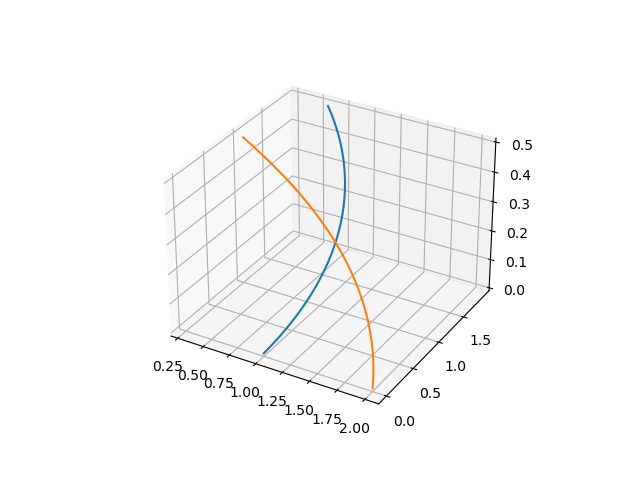

In [83]:
# sectional curves

%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import *

fig = plt.figure(' ')
ax = plt.axes(projection="3d")    # set up for 3D work

s = np.linspace(1,2,50)

t = (4*np.pi/10)*(s - 1)
ax.plot(s*np.cos(t), s*np.sin(t), 2*t/5)

t = (4*np.pi/10)*(2 - s)
ax.plot(s*np.cos(t), s*np.sin(t), 2*t/5)


The simplest surface is just the graph of a function above some planar domain, $D$. That is,

\begin{equation}\label{eq:cM}
  \cM \equiv \{(x_1,x_2,f(x_1,x_2)):(x_1,x_2)\in D\}
\end{equation}

We achieve tangent vectors by differentiating in the coordinate directions

\begin{equation}\label{eq:cMtan}
   t_1(x_1,x_2) = (1,0,f_{x_1}(x_1,x_2)) \and t_2(x_1,x_2) = (0,1,f_{x_2}(x_1,x_2))
\end{equation}

and their unit normal via the cross product

\begin{equation}\label{eq:cMperp}
  n \equiv \frac{t_1\times t_2}{\|t_1\times t_2\|} = \frac{(-f_{x_1},-f_{x_2}, 1)}{(1+f_{x_1}^2+f_{x_2}^2)^{1/2}}
\end{equation}

A general tangent vector is $v=a_1t_1+a_2t_2$, let $\alpha$ be a curve on $\cM$ where $\alpha(0)=p$ and $\alpha'(0)=v$ then the Shape operator at $p$ applied to $v$ is

\begin{equation}\label{eq:Shape}
  S_pv \equiv -\nabla_v n(p) = \lim_{h\to 0}\frac{n(\alpha(h))-n(p)}{h}
\end{equation}

where

\begin{equation}\label{eq:ddir}
  \eqalign{ \nabla_{t_1} n(y) 
  &= \lim_{h\to 0}\frac{n(y+ht_1)-n(y)}{h} \cr
  &= \lim_{h\to 0}\frac{(-f_{x_1}(x_1+h,x_2,f(x_1,x_2)+hf_{x_1}(x_1,x_2))-(-f_{x_1}(x_1,x_2),-f_{x_1}(x_1,x_2),1}{h} }
\end{equation}

If we specialize to $p=0$ and assume $f(0,0)=f_{x_1}(0,0)=f_{x_2}(0,0)=0$ we find

\begin{equation}\label{eq:n12}
  \eqalign{
  \nabla_{t_1}n(0) &= n_{x_1}(0) =  (-f_{x_1x_1},-f_{x_1x_2}, 0) = -f_{x_1x_1}t_1 - f_{x_1x_2}t_2  \cr
  \nabla_{t_2}n(0) &= n_{x_2}(0) =  (-f_{x_2x_1},-f_{x_2x_2}, 0) = -f_{x_2x_1}t_1 - f_{x_2x_2}t_2}
\end{equation}

so 

\begin{equation}\label{eq:ShM0}
  S(0) = \begin{pmatrix} f_{x_1x_1}(0,0) & f_{x_1x_2}(0,0) \\ f_{x_1x_2}(0,0) & f_{x_2x_2}(0,0) \end{pmatrix}
\end{equation}